### orthometric height vs. corrected orthometric height. 
1. convert pixc height to raster data.


In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from utils.pixc2raster import pixc2raster
from utils.functions import meter2deg, points_directional_stats, points_directional_sector


In [2]:
## chaohu
paths_pixc_height_chaohu = sorted(glob('data/chaohu-lake/swot-pixc/*filtered_height.nc')) 
path_vec_chaohu = 'data/chaohu-lake/hydrolake_chaohu.gpkg'
## dianchi
paths_pixc_height_dianchi = sorted(glob('data/dianchi-lake/swot-pixc/*filtered_height.nc')) 
path_vec_dianchi = 'data/dianchi-lake/hydrolake_dianchi_edit.gpkg'
## gyaring
paths_pixc_height_gyaring = sorted(glob('data/gyaring-lake/swot-pixc/*filtered_height.nc'))
path_vec_gyaring = 'data/gyaring-lake/hydrolake_gyaring.gpkg'
## hulun 
paths_pixc_height_hulun = sorted(glob('data/hulun-lake/swot-pixc/*filtered_height.nc'))
path_vec_hulun = 'data/hulun-lake/hydrolake_hulun.gpkg'
## siling_co
paths_pixc_height_siling = sorted(glob('data/siling_co-lake/swot-pixc/*filtered_height.nc'))
path_vec_siling = 'data/siling_co-lake/hydrolake_siling_co.gpkg'



In [3]:
## 1. read vector file of the lake.
chaohu_gdf = gpd.read_file(path_vec_chaohu)
dianchi_gdf = gpd.read_file(path_vec_dianchi)
gyaring_gdf = gpd.read_file(path_vec_gyaring)
hulun_gdf = gpd.read_file(path_vec_hulun)
siling_gdf = gpd.read_file(path_vec_siling)
## 2. read pixel cloud data
pixc_height_chaohu_xr = xr.open_dataset(paths_pixc_height_chaohu[4])
pixc_height_dianchi_xr = xr.open_dataset(paths_pixc_height_dianchi[3])
pixc_height_gyaring_xr = xr.open_dataset(paths_pixc_height_gyaring[5])  ## 4-9
pixc_height_hulun_xr = xr.open_dataset(paths_pixc_height_hulun[4])      ## 4-9
pixc_height_siling_xr = xr.open_dataset(paths_pixc_height_siling[2])    ## 2-10


#### 1. show the orthometric height and corrected orthometric height

In [10]:
pixc_height_xr = pixc_height_chaohu_xr
lake_gdf = chaohu_gdf


Text(0.5, 1.0, 'pixc corrected height_ortho(2024-06-25)')

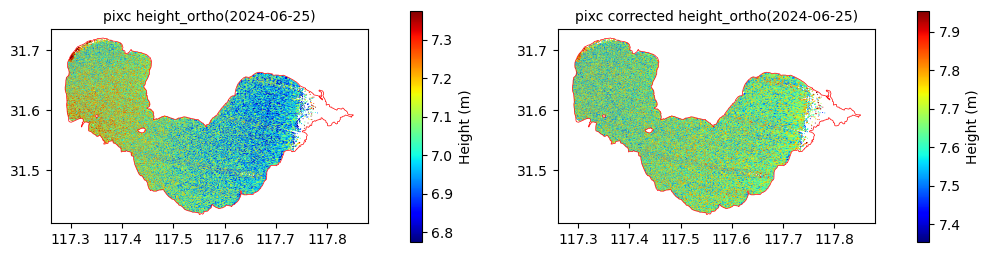

In [ ]:
ht_ortho_mean = np.nanmean(pixc_height_xr.ht_ortho.values)
ht_ortho_cor_mean = np.nanmean(pixc_height_xr.ht_ortho_cor.values)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
## ax0
scat = ax[0].scatter(x= pixc_height_xr.longitude, y=pixc_height_xr.latitude, 
                      c=pixc_height_xr.ht_ortho.values,
                      vmin=ht_ortho_mean - 0.3,
                      vmax=ht_ortho_mean + 0.3,
                      s=0.5, edgecolor='none', cmap='jet')
lake_gdf.plot(ax=ax[0], color='none', edgecolor='red', linewidth=0.5)
plt.colorbar(scat, label='Height (m)', shrink=0.6, pad=0.1)  
ax[0].set_title('pixc height_ortho' + f'({pixc_height_xr.attrs["date"]})', fontsize=10)
## ax1
scat = ax[1].scatter(x=pixc_height_xr.longitude, y=pixc_height_xr.latitude, 
                      c=pixc_height_xr.ht_ortho_cor.values,
                      vmin=ht_ortho_cor_mean - 0.3,
                      vmax=ht_ortho_cor_mean + 0.3,
                      s=0.5, edgecolor='none', cmap='jet')
lake_gdf.plot(ax=ax[1], color='none', edgecolor='red', linewidth=0.5)
plt.colorbar(scat, label='Height (m)', shrink=0.6, pad=0.1)  
ax[1].set_title('pixc corrected height_ortho' + f'({pixc_height_xr.attrs["date"]})', fontsize=10)


In [12]:
## chaohu
ids_ht_ortho = np.where((abs(pixc_height_xr.latitude - 31.55).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho.values)))[0]
ids_ht_ortho_cor = np.where((abs(pixc_height_xr.latitude - 31.55).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho_cor.values)))[0]
# # # dianchi
# ids_ht_ortho = np.where((abs(pixc_height_xr.longitude - 102.68).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho.values)))[0]
# ids_ht_ortho_cor = np.where((abs(pixc_height_xr.longitude - 102.68).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho_cor.values)))[0]
# ## gyaring
# ids_ht_ortho = np.where((abs(pixc_height_xr.latitude - 34.93).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho.values)))[0]
# ids_ht_ortho_cor = np.where((abs(pixc_height_xr.latitude - 34.93).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho_cor.values)))[0]
## hulun   
# ids_ht_ortho = np.where((abs(pixc_height_xr.longitude - 117.45).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho.values)))[0]
# ids_ht_ortho_cor = np.where((abs(pixc_height_xr.longitude - 117.45).values<0.0001) & (~np.isnan(pixc_height_xr.ht_ortho_cor.values)))[0]
# ## siling 
# ids_ht_ortho = np.where((abs(pixc_height_xr.latitude - 31.77).values<0.00003) & (~np.isnan(pixc_height_xr.ht_ortho.values)))[0]
# ids_ht_ortho_cor = np.where((abs(pixc_height_xr.latitude - 31.77).values<0.00003) & (~np.isnan(pixc_height_xr.ht_ortho_cor.values)))[0]
print(ids_ht_ortho.shape, ids_ht_ortho_cor.shape)



(959,) (959,)


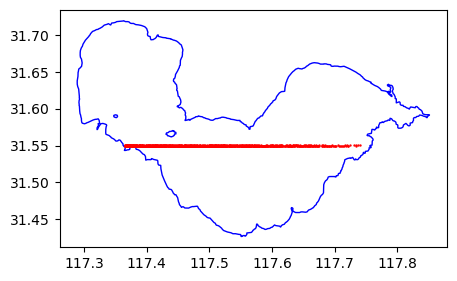

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
lake_gdf.plot(ax=ax, color='none', edgecolor='blue', linewidth=1)
ax.scatter(x=pixc_height_xr.longitude[ids_ht_ortho], y=pixc_height_xr.latitude[ids_ht_ortho], color='red', s=0.5)


In [19]:
### fitting 
## chaohu
z = np.polyfit(pixc_height_xr.longitude.values[ids_ht_ortho], pixc_height_xr.ht_ortho.values[ids_ht_ortho], 3)
f_ortho = np.poly1d(z)
x_ortho = np.linspace(117.365, 117.73, 100)
z = np.polyfit(pixc_height_xr.longitude[ids_ht_ortho_cor].values, pixc_height_xr.ht_ortho_cor.values[ids_ht_ortho_cor], 3)
f_ortho_cor = np.poly1d(z)
x_ortho_cor = np.linspace(117.365, 117.73, 100)

# ## dianchi
# z = np.polyfit(pixc_height_xr.latitude[ids_ht_ortho], pixc_height_xr.ht_ortho.values[ids_ht_ortho], 3)
# f_ortho = np.poly1d(z)
# x_ortho = np.linspace(24.7, 24.95, 100)
# z = np.polyfit(pixc_height_xr.latitude[ids_ht_ortho_cor], pixc_height_xr.ht_ortho_cor.values[ids_ht_ortho_cor], 3)
# f_ortho_cor = np.poly1d(z)
# x_ortho_cor = np.linspace(24.7, 24.95, 100)

# ## gyaring
# z = np.polyfit(pixc_height_xr.longitude[ids_ht_ortho], pixc_height_xr.ht_ortho.values[ids_ht_ortho], 3)
# f_ortho = np.poly1d(z)
# x_ortho = np.linspace(97.07, 97.45, 100)
# z = np.polyfit(pixc_height_xr.longitude[ids_ht_ortho_cor], pixc_height_xr.ht_ortho_cor.values[ids_ht_ortho_cor], 3)
# f_ortho_cor = np.poly1d(z)
# x_ortho_cor = np.linspace(97.07, 97.45, 100)

## hulun  
# z = np.polyfit(pixc_height_xr.latitude[ids_ht_ortho], pixc_height_xr.ht_ortho.values[ids_ht_ortho], 3)
# f_ortho = np.poly1d(z)
# x_ortho = np.linspace(48.79, 49.18, 100)
# z = np.polyfit(pixc_height_xr.latitude[ids_ht_ortho_cor], pixc_height_xr.ht_ortho_cor.values[ids_ht_ortho_cor], 3)
# f_ortho_cor = np.poly1d(z)
# x_ortho_cor = np.linspace(48.79, 49.18, 100)

# ## siling
# z = np.polyfit(pixc_height_xr.longitude[ids_ht_ortho], pixc_height_xr.ht_ortho.values[ids_ht_ortho], 3)
# f_ortho = np.poly1d(z)
# x_ortho = np.linspace(88.7, 89.23, 100)
# z = np.polyfit(pixc_height_xr.longitude[ids_ht_ortho_cor], pixc_height_xr.ht_ortho_cor.values[ids_ht_ortho_cor], 3)
# f_ortho_cor = np.poly1d(z)
# x_ortho_cor = np.linspace(88.7, 89.23, 100)



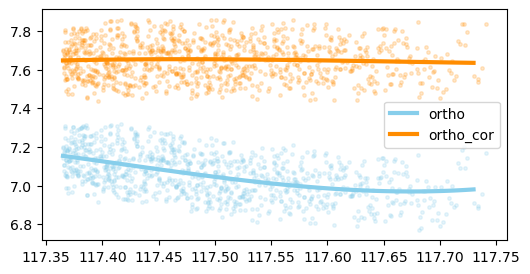

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.plot(pixc_height_xr.longitude[ids_ht_ortho], pixc_height_xr.ht_ortho.values[ids_ht_ortho], color='skyblue', 
         marker='.', linestyle='None', alpha=0.2, markersize=5)
plt.plot(pixc_height_xr.longitude[ids_ht_ortho_cor], pixc_height_xr.ht_ortho_cor.values[ids_ht_ortho_cor], 
         marker='.', linestyle='None', color='darkorange', alpha=0.2, markersize=5)
ax.plot(x_ortho, f_ortho(x_ortho), '-', color='skyblue', label='ortho', linewidth=3)
ax.plot(x_ortho_cor, f_ortho_cor(x_ortho_cor), '-', color='darkorange', label='ortho_cor', linewidth=3)
ax.legend()


### 2. histogram of orthometric height.

In [33]:
ht_ortho_median = np.nanmedian(pixc_height_xr.ht_ortho.values)
ht_ortho_cor_median = np.nanmedian(pixc_height_xr.ht_ortho_cor.values)
print(ht_ortho_median, ht_ortho_cor_median)
ht_ortho_var = pixc_height_xr.ht_ortho.values.ravel()-ht_ortho_median
ht_ortho_cor_var = pixc_height_xr.ht_ortho_cor.values.ravel()-ht_ortho_cor_median


7.0718493 7.6543333530426025


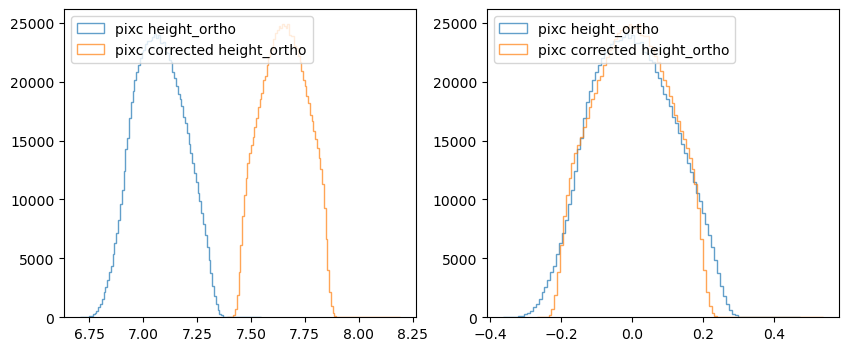

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(pixc_height_xr.ht_ortho.values.ravel(), bins=100, 
                        alpha=0.7, histtype='step', label='pixc height_ortho');
ax[0].hist(pixc_height_xr.ht_ortho_cor.values.ravel(), bins=100, 
                        alpha=0.7, histtype='step', label='pixc corrected height_ortho');
ax[1].hist(ht_ortho_var, bins=100, alpha=0.7, histtype='step', label='pixc height_ortho');
ax[1].hist(ht_ortho_cor_var, bins=100, alpha=0.7, histtype='step', label='pixc corrected height_ortho');
ax[0].legend(loc='upper left');
ax[1].legend(loc='upper left');


#### 3. directional statistics of the orthometric height variation


In [35]:
ht_var_lons, ht_var_lats, ht_var_vals = [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]
ht_cor_var_lons, ht_cor_var_lats, ht_cor_var_vals = [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]
## divide ht_othor into 8 directional sectors
for i, (lons_i, lats_i, vals_i) in enumerate(zip(ht_var_lons, ht_var_lats, ht_var_vals)):
    lons_se, lats_se, vals_se = points_directional_sector(
                                    lons=pixc_height_xr.longitude.values, 
                                    lats=pixc_height_xr.latitude.values, 
                                    values=ht_ortho_var, 
                                    angle_range=(45*i, 45*(i+1)))
    ht_var_lons[i], ht_var_lats[i], ht_var_vals[i] = lons_se, lats_se, vals_se
## divide ht_othor_cor into 8 directional sectors
for i, (lons_i, lats_i, vals_i) in enumerate(zip(ht_cor_var_lons, ht_cor_var_lats, ht_cor_var_vals)):
    lons_se, lats_se, vals_se = points_directional_sector(
                                    lons=pixc_height_xr.longitude.values, 
                                    lats=pixc_height_xr.latitude.values, 
                                    values=ht_ortho_cor_var, 
                                    angle_range=(45*i, 45*(i+1)))
    ht_cor_var_lons[i], ht_cor_var_lats[i], ht_cor_var_vals[i] = lons_se, lats_se, vals_se


In [36]:
ht_var_vals_mean = [np.nanmean(ht_res) for ht_res in ht_var_vals]
ht_cor_var_vals_mean = [np.nanmean(ht_res) for ht_res in ht_cor_var_vals]
ht_var_std = np.std(ht_var_vals_mean)
ht_cor_var_std = np.std(ht_cor_var_vals_mean) 
print(ht_var_std, ht_cor_var_std)


0.051151525 0.005557769556706384


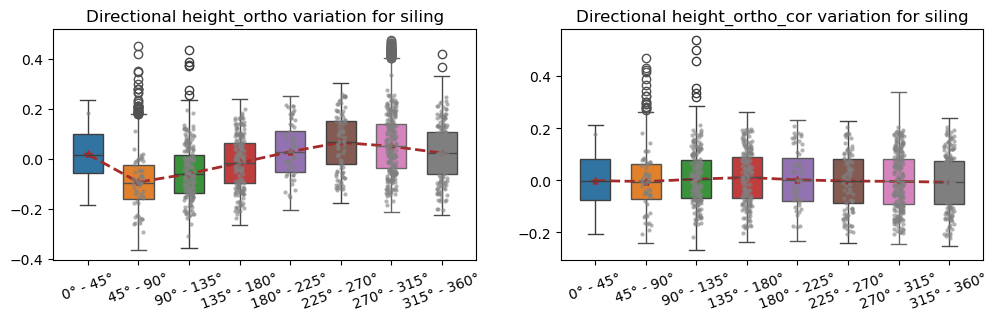

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
color = 'grey'
for i in range(8):
    boxplot = sns.boxplot(x=i, y=ht_var_vals[i], width=0.6, ax=ax[0])
    stripplot = sns.stripplot(x=i, y=ht_var_vals[i][::1000], marker="o", size=3, alpha=0.6, color=color, ax=ax[0])
ax[0].plot(range(8), ht_var_vals_mean, '--*', color='brown', lw=2)
ax[0].set_xticks(range(8))
ax[0].set_xticklabels([f"{45*i}° - {45*(i+1)}°" for i in range(8)], rotation=20)
ax[0].set_title('Directional height_ortho variation for siling');
for i in range(8):
    boxplot = sns.boxplot(x=i, y=ht_cor_var_vals[i], width=0.6, ax=ax[1])
    stripplot = sns.stripplot(x=i, y=ht_cor_var_vals[i][::1000], marker="o", size=3, alpha=0.6, color=color, ax=ax[1])
ax[1].plot(range(8), ht_cor_var_vals_mean, '--*', color='brown', lw=2)
ax[1].set_xticks(range(8))
ax[1].set_xticklabels([f"{45*i}° - {45*(i+1)}°" for i in range(8)], rotation=20);
ax[1].set_title('Directional height_ortho_cor variation for siling');
